In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle

In [2]:
df= pd.read_csv('sentiment_reviews_50.csv')

In [3]:
df.head()

,review,label
0,Excellent product. Simple to use and delivers ...,positive
1,I regret buying this product. It failed to mee...,negative
2,Very satisfied with the purchase. Good quality...,positive
3,Very poor quality and frustrating to use. I wo...,negative
4,Very satisfied with the purchase. Good quality...,positive


In [4]:
df.shape

(5000, 2)

In [5]:
# change the review dtype to string and mapping of label feature
df['review']= df['review'].astype(str)
df['label']= df['label'].map({'negative':0, 'positive':1})

In [6]:
texts= df['review'].values
labels= df['label'].values

In [10]:
texts[0]

'Excellent product. Simple to use and delivers good results.'

In [8]:
labels[0]

np.int64(1)

In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [19]:
tokenizer= Tokenizer(num_words=10000)

In [28]:
tokenizer.fit_on_texts(texts)

In [30]:
sequence= tokenizer.texts_to_sequences(texts)

In [31]:
sequence[0]

[37, 2, 38, 6, 11, 1, 39, 21, 40]

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train, x_test, y_train, y_test= train_test_split(sequence, labels, test_size=0.2, random_state=42)

In [34]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [35]:
x_train= pad_sequences(x_train, maxlen=50)
x_test= pad_sequences(x_test, maxlen=50)

In [36]:
from tensorflow.keras.models import Sequential

In [37]:
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding

In [38]:
model= Sequential()

In [39]:
model.add(Embedding(input_dim=10000, output_dim=32, input_length=50))

model.add(SimpleRNN(32))

model.add(Dense(1, activation='sigmoid'))

C:\Users\Pawanpreet Kaur\anaconda3\envs\Tensor_Flow\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [40]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [41]:
history=model.fit(x_train, y_train,
          epochs=50, 
          batch_size=32,
          validation_split=0.2)

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9941 - loss: 0.0862 - val_accuracy: 1.0000 - val_loss: 0.0054
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 1.0000 - loss: 0.0033 - val_accuracy: 1.0000 - val_loss: 0.0021
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 1.0000 - loss: 9.0797e-04 - val_accuracy: 1.0000 - val_loss: 7.2343e-04
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 1.0000 - loss: 6.0734e-04 - val_accuracy: 1.0000 - val_loss: 5.0781e-04
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 1.0000 - loss: 4.3854e-04 - val_accuracy: 1.0000 - val_loss: 3.7702e-04
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 1.0000 - loss: 3.3340e-04 - val_accuracy: 1.0000 - val_loss: 2.9911e-04
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 

In [42]:
model.evaluate(x_test, y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 1.0000 - loss: 5.6550e-06


[5.654952474287711e-06, 1.0]

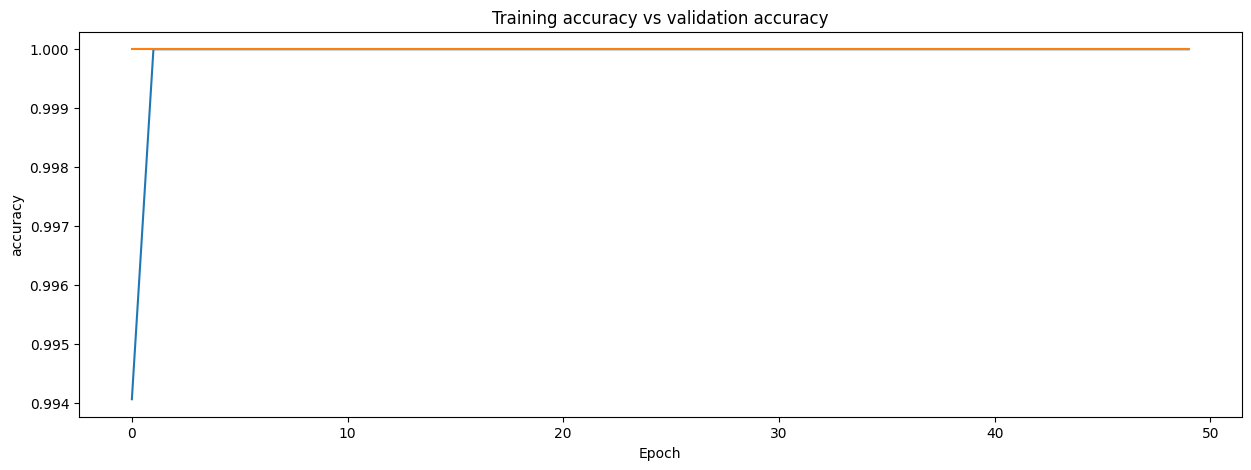

In [43]:
plt.figure(figsize=(15, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Training accuracy vs validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.show()

In [44]:
def predict(text):
    seq = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(seq, maxlen=200)
    pred = model.predict(padded)[0][0]
    return "positive" if pred >= 0.5 else "negative"

In [45]:
print(predict('Great experience overall. The product meets my expectations and is easy to use.'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
positive


In [46]:
print(predict('The product does not perform as advertised and feels cheap.'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
negative


In [47]:
model.save('review_rnn2.keras')

In [49]:
with open('tokenizer2.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)